<a href="https://colab.research.google.com/github/darshit001/MerCari-Data-Analysis/blob/main/Mericari-Updtae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import Ridge , LogisticRegression
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test_stg2.tsv', sep='\t')

In [4]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1482535, 8)
Test data shape: (3460725, 7)


In [5]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [7]:
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


**2- Data Preprocessing**

=>1  Missing data

In [8]:
full_data = pd.concat([train, test], sort=False)

In [9]:
full_data.isnull().sum()

,0
train_id,3460725
name,0
item_condition_id,0
category_name,21160
brand_name,2109172
price,3460725
shipping,0
item_description,16
test_id,1482535


In [10]:
print(pd.isnull(train).sum())
print("------------")
print(pd.isnull(test).sum())

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          6
dtype: int64
------------
test_id                    0
name                       0
item_condition_id          0
category_name          14833
brand_name           1476490
shipping                   0
item_description          10
dtype: int64


In [11]:

train.brand_name.fillna(value = "NoBrand", inplace = True)
test.brand_name.fillna(value = "NoBrand", inplace = True)

train.category_name.fillna(value = "Other/Other/Other", inplace = True)
test.category_name.fillna(value = "Other/Other/Other", inplace = True)

train.item_description.fillna(value = "No description yet", inplace = True)
test.item_description.fillna(value = "No description yet", inplace = True)

In [12]:
print(train.isnull().any())
print("------------")
print(test.isnull().any())

train_id             False
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
dtype: bool
------------
test_id              False
name                 False
item_condition_id    False
category_name        False
brand_name           False
shipping             False
item_description     False
dtype: bool


2) Subclasses¶

In [13]:
def split(txt):
    try :
        return txt.split("/")
    except :
        return ("Other", "Other", "Other")

In [14]:
train['general_category']=''
train['subcategory_1'] = ''
train['subcategory_2'] = ''

test['general_category']=''
test['subcategory_1'] = ''
test['subcategory_2'] = ''

In [15]:
train['general_category'],train['subcategory_1'],train['subcategory_2'] = \
zip(*train['category_name'].apply(lambda x: split(x)))

test['general_category'],test['subcategory_1'],test['subcategory_2'] = \
zip(*test['category_name'].apply(lambda x: split(x)))

In [16]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_category,subcategory_1,subcategory_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NoBrand,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NoBrand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NoBrand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NoBrand,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NoBrand,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [17]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,general_category,subcategory_1,subcategory_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NoBrand,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NoBrand,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NoBrand,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


Text(0.5, 1.0, 'Price Distribution')

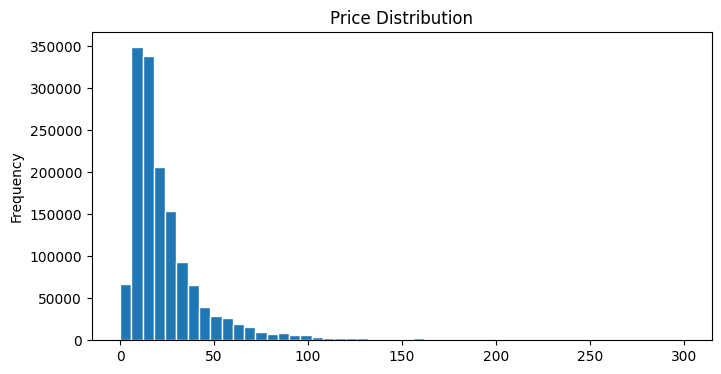

In [18]:
train.price.plot.hist(bins=50, figsize=(8,4), edgecolor='white',range=[0,300])

plt.title('Price Distribution')

3) EDA

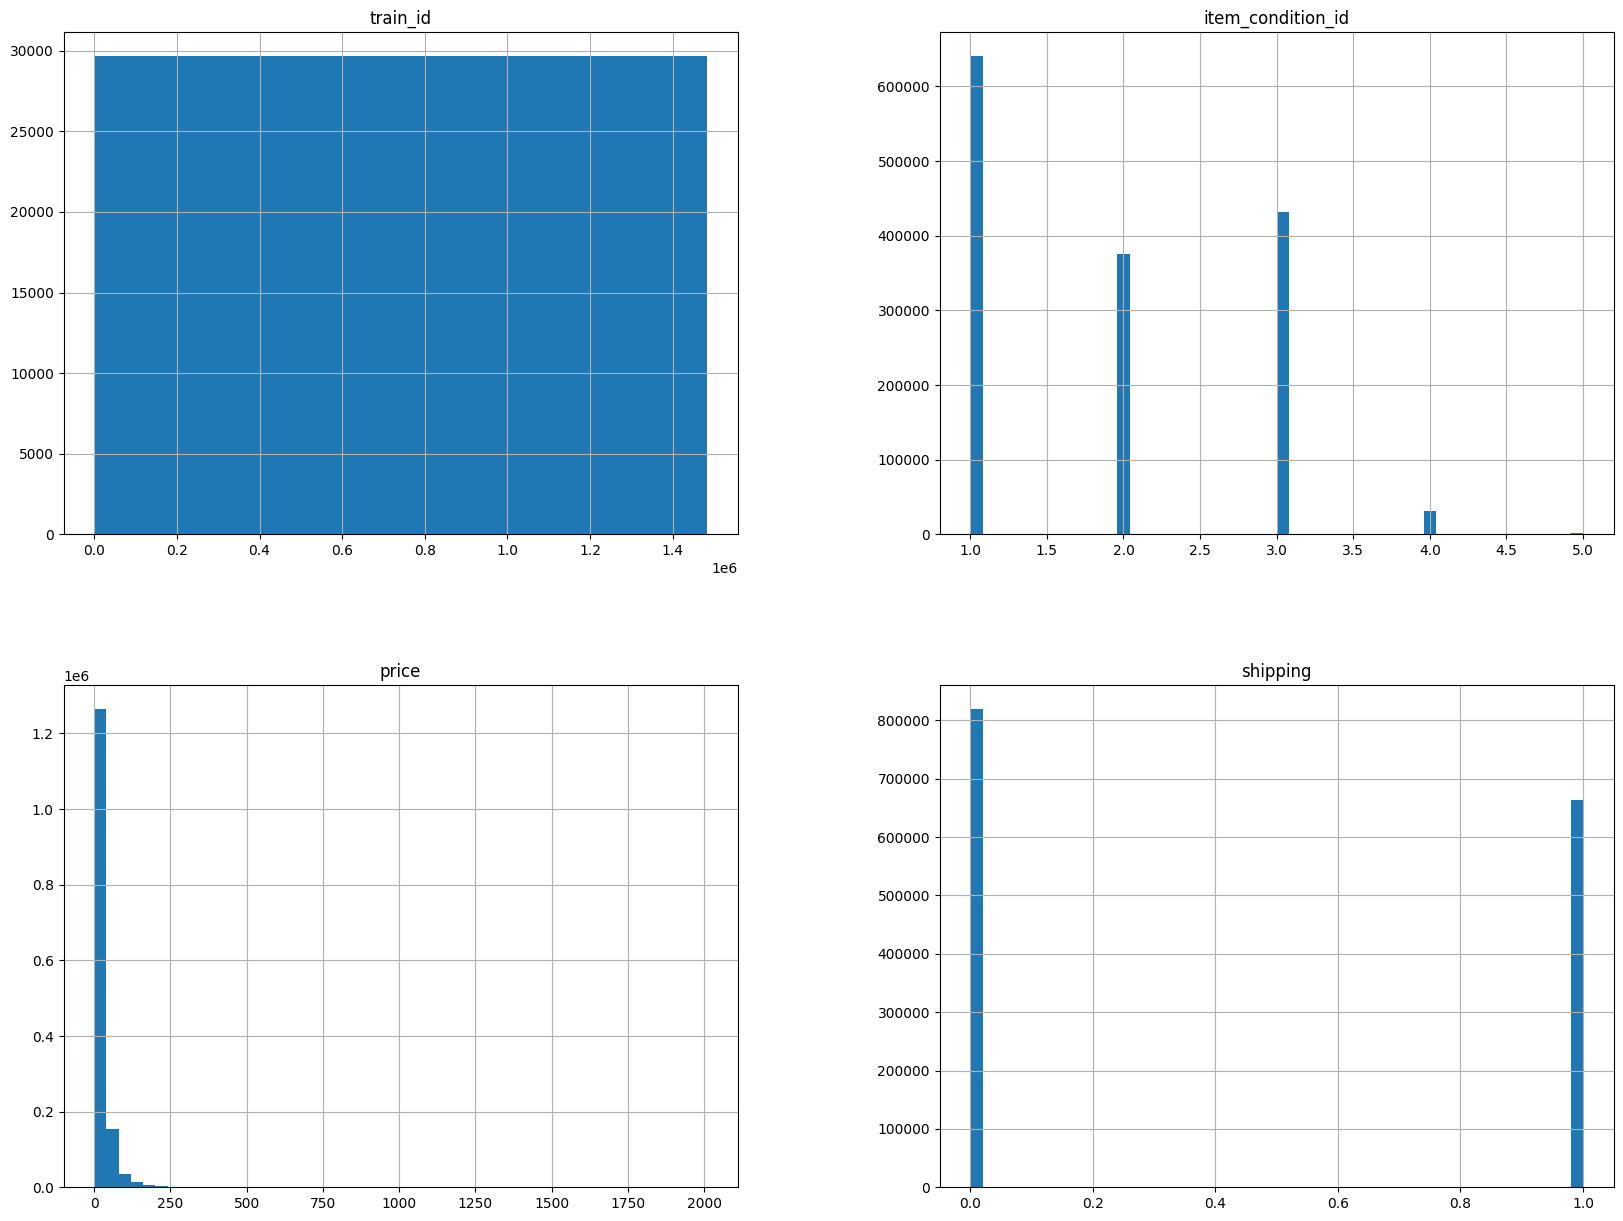

In [19]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
train['item_description'].value_counts()

,count
item_description,
No description yet,82495
New,4099
Brand new,3058
Good condition,1274
Great condition,1158
...,...
Well made denim vest with studs. Size small. Cute vest perfect over a dress or shirt. Korean brand,1
"1"" buttons, price is firm and is homemade :D",1
"This skirt is new with tags and a great print for fall! Cross posted Skirt/shirt/scarf/fall/winter/women's/juniors *CHECK OUT MY DAILY DEALS* SUNDAY SALE! 2PM - 10PM EST SAVE [rm] off every item. BUY MORE SAVE MORE. Buy 2 items get [rm] off each item. Limit 5 items/[rm] off each. MONDAY FUNDAY! [rm] off when you purchase 2 or more items from my shop! 10AM-2PM EST ONLY. [rm] TUESDAY! [rm] off any legging purchase including singles, sets, and outfits. No Limit. ALL DAY. WACKY WEDNESDAY! [rm] off any outfit, set or skirt purchase 12PM-7PM EST ONLY. THIRSTY THURSDAY HAPPY HOUR! Free gift with every purchase 4PM-6PM EST ONLY. FREEBIE FRIDAY! Mystery savings coupon with any purchase for future use! All day! EVERY ITEM EVEN IF YOU DONT SEE THIS POST IN DETAILS. How it works: Comment sold on the items you want & allow me to change prices when you're finished shopping. Thanks for looking!",1


**EDA**

<Axes: xlabel='item_condition_id'>

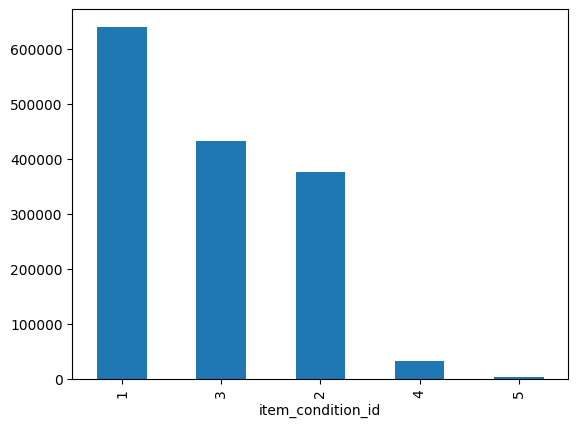

In [21]:
train['item_condition_id'].value_counts().plot(kind='bar')

In [22]:
train['brand_name'].value_counts()


,count
brand_name,
NoBrand,632682
PINK,54088
Nike,54043
Victoria's Secret,48036
LuLaRoe,31024
...,...
The Learning Journey,1
Pampers Baby Fresh,1
Huggies One & Done,1


<Axes: xlabel='general_category'>

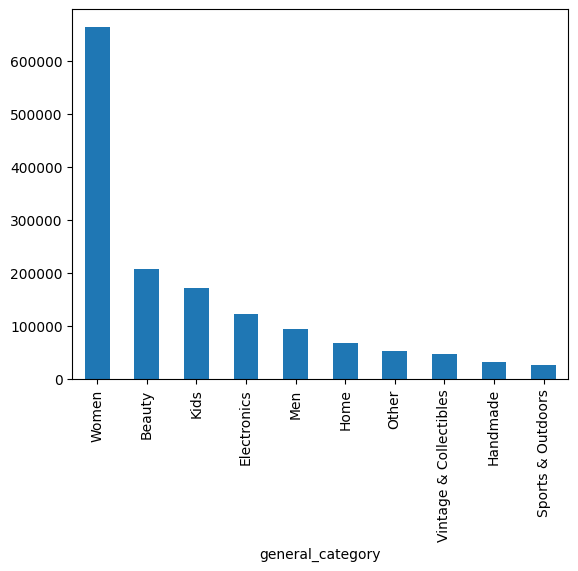

In [23]:
train['general_category'].value_counts().plot(kind='bar')

,count
subcategory_1,
Athletic Apparel,134383
Makeup,124624
Tops & Blouses,106960
Shoes,100452
Jewelry,61763
...,...
Candles,64
Ceramics and Pottery,57
Dolls and Miniatures,49


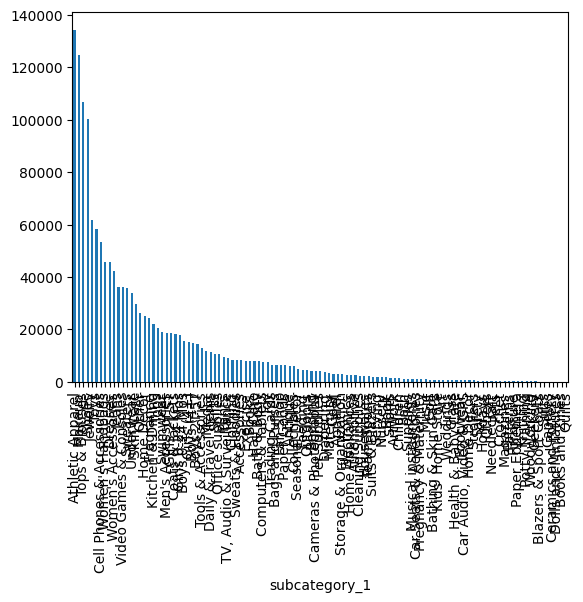

In [24]:
train['subcategory_1'].value_counts().plot(kind='bar')
train['subcategory_1'].value_counts()

,count
subcategory_2,
"Pants, Tights, Leggings",60177
Other,56551
Face,50171
T-Shirts,46380
Shoes,32168
...,...
St Patricks,1
Garbage Disposals,1
Decorating,1


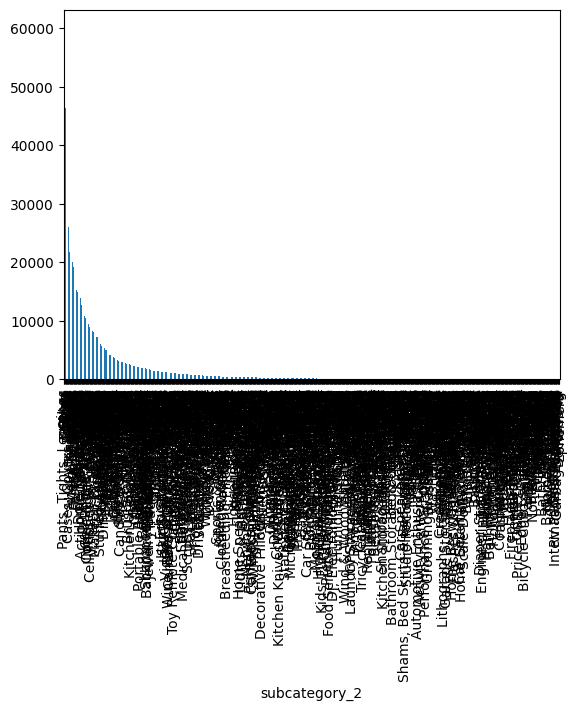

In [25]:
train['subcategory_2'].value_counts().plot(kind='bar')
train['subcategory_2'].value_counts()

<Axes: >

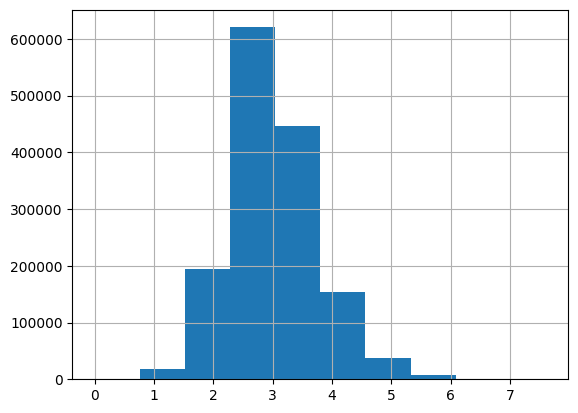

In [26]:
log_prices = np.log1p(train.price)
log_prices.hist()

In [27]:
scaler = MinMaxScaler()
X_train_item_condition_id = scaler.fit_transform(train['item_condition_id'].values.reshape(-1,1))

In [28]:
from sklearn.preprocessing import LabelBinarizer

lb_brand_name = LabelBinarizer(sparse_output=True)
X_train_brand = lb_brand_name.fit_transform(train['brand_name'])

lb_shipping = LabelBinarizer(sparse_output=True)
X_train_shipping = lb_shipping.fit_transform(train['shipping'])

lb_cat_0 = LabelBinarizer(sparse_output=True)
X_train_general_category = lb_cat_0.fit_transform(train['general_category'])

lb_cat_1 = LabelBinarizer(sparse_output=True)
X_train_subcategory_1 = lb_cat_1.fit_transform(train['subcategory_1'])

lb_cat_2 = LabelBinarizer(sparse_output=True)
X_train_subcategory_2 = lb_cat_2.fit_transform(train['subcategory_2'])

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_desc = TfidfVectorizer(max_features=50000, ngram_range=(1, 1), stop_words='english', norm='l2',lowercase=True)
name_vectorizer = CountVectorizer(stop_words='english')

X_train_descp = tfidf_desc.fit_transform(train['item_description'])
X_train_name = name_vectorizer.fit_transform(train['name'])

In [30]:
from scipy.sparse import hstack

X_train = hstack((X_train_name, X_train_descp, X_train_brand, X_train_item_condition_id, X_train_shipping, X_train_general_category, X_train_subcategory_1, X_train_subcategory_2)).tocsr()

In [31]:
X_train

<1482535x161301 sparse matrix of type '<class 'numpy.float64'>'
	with 34484882 stored elements in Compressed Sparse Row format>

The correlation with price

In [32]:
# Select only numerical features for correlation calculation
numerical_features = train.select_dtypes(include=np.number).columns
corr_matrix = train[numerical_features].corr()
corr_matrix

,train_id,item_condition_id,price,shipping
train_id,1.000000,-0.000113,0.000478,0.000472
item_condition_id,-0.000113,1.000000,-0.000807,-0.191154
price,0.000478,-0.000807,1.000000,-0.097211
shipping,0.000472,-0.191154,-0.097211,1.000000


In [33]:
from scipy.sparse import hstack
X_train = hstack((X_train_name, X_train_descp, X_train_brand, X_train_item_condition_id,
X_train_shipping, X_train_general_category, X_train_subcategory_1, X_train_subcategory_2)).tocsr()

<Axes: >

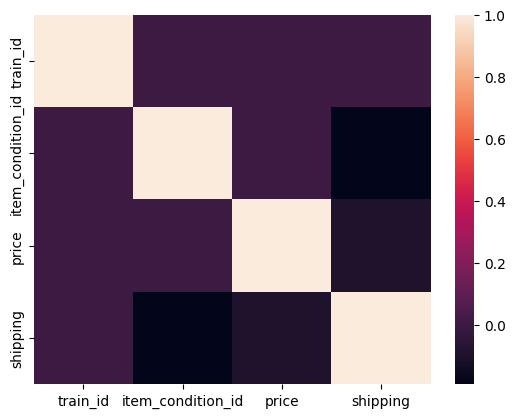

In [34]:
import seaborn as sns

sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

3- Stratified sampling

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_index in split.split(train, train['general_category']):
    train_idx = train_index
    test_idx = test_index

In [36]:
test_data = X_train[test_idx]
log_test_prices = log_prices.iloc[test_idx]
train_data = X_train[train_idx]
log_train_prices = log_prices.iloc[train_idx]

4- Obtain selected models

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def performance(ytrue, ypredicted):
    print("MSE: ",np.sqrt(mean_squared_error(ytrue, ypredicted)))
    print("MAE: ", np.sqrt(mean_absolute_error(ytrue, ypredicted)))

1) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_data, log_train_prices)

In [ ]:
y_pred = regressor.predict(test_data)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

performance(log_test_prices, y_pred)

2) SGD Regresso

In [ ]:
from sklearn.linear_model import SGDRegressor

# SkLearn SGD classifier
clf_ = SGDRegressor()
clf_.fit(train_data, log_train_prices)
performance(log_test_prices, clf_.predict(test_data))

3) Ridge & Lasso

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge,RidgeCV, Lasso, LassoCV,ElasticNet, ElasticNetCV

In [ ]:
lasso = Lasso(max_iter = 100000)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(train_data, log_train_prices)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(train_data, log_train_prices)

print('The Lasso I:')
print("Alpha =", lassocv.alpha_)
performance(log_test_prices, lasso.predict(test_data))

In [ ]:
ridge_lin_reg = Ridge(alpha=4, max_iter= 500)
ridge_lin_reg.fit(train_data, log_train_prices)

performance(log_test_prices,ridge_lin_reg.predict(test_data))

4) SVR

In [ ]:
from sklearn.svm import SVR

kernel_SVR = SVR(kernel='rbf', verbose=True, max_iter= 1000)
kernel_SVR.fit(train_data, log_train_prices)

performance(log_test_prices,kernel_SVR.predict(test_data))

RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(verbose=True, max_depth=15, n_estimators=30)
forest_reg.fit(train_data, log_train_prices)

performance(log_test_prices, forest_reg.predict(test_data))

6) LGBM Regresso

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm_model = LGBMRegressor(verbose=0, max_depth=15, n_estimators=30)
lgbm_model.fit(train_data, log_train_prices, verbose=0)

performance(log_test_prices,lgbm_model.predict(test_data))

5- Fine-tune mode

In [ ]:
from sklearn.model_selection import PredefinedSplit
split_index = [-1 if x in train_idx else 0 for x in range(X_train.shape[0])]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=5, high=200),
        'max_depth': randint(low=10, high=100),
    }

lgbm_srch = LGBMRegressor()
pds = PredefinedSplit(test_fold = split_index)

rnd_search = RandomizedSearchCV(lgbm_srch, param_distributions=param_distribs,
                                n_iter=20, cv=pds, scoring='neg_mean_squared_error')

rnd_search.fit(X_train, log_prices)
performance(log_test_prices,rnd_search.best_estimator_.predict(test_data))